<center>

# Predictive Analysis of Fraud Detection

</center>

## Importing Necessary Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
%matplotlib inline

## Data Exploration

In [2]:
df = pd.read_csv('fraudTrain.csv')

# An overview of all the columns and their values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [3]:
# Displaying the first 5 rows of the dataset
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
# Printing the unique values for each column
cols = df.columns

for col in cols:
    print(f"{col} : {len(df[col].unique())}")

Unnamed: 0 : 1296675
trans_date_trans_time : 1274791
cc_num : 983
merchant : 693
category : 14
amt : 52928
first : 352
last : 481
gender : 2
street : 983
city : 894
state : 51
zip : 970
lat : 968
long : 969
city_pop : 879
job : 494
dob : 968
trans_num : 1296675
unix_time : 1274823
merch_lat : 1247805
merch_long : 1275745
is_fraud : 2


In [5]:
# Dropping the columns that are not needed
df.drop(['Unnamed: 0', 'unix_time'], axis = 1, inplace = True)
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,zip,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,38.674999,-78.632459,0


In [6]:
# Checking the imbalance in the target variable
df.is_fraud.value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [7]:
# Summary statistics of the dataset
df.describe()

,cc_num,amt,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,3.853734e+01,-9.022646e+01,5.788652e-03
std,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,5.109788e+00,1.377109e+01,7.586269e-02
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.902779e+01,-1.666712e+02,0.000000e+00
25%,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,3.473357e+01,-9.689728e+01,0.000000e+00
50%,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,3.936568e+01,-8.743839e+01,0.000000e+00
75%,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,4.195716e+01,-8.023680e+01,0.000000e+00
max,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,6.751027e+01,-6.695090e+01,1.000000e+00


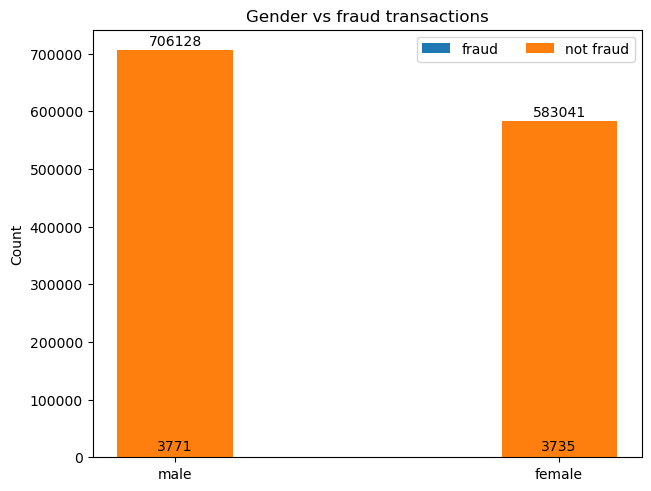

In [8]:
# Gender-based fraud relationships
gender = ["male", 'female']
fraud_count = {
    'fraud': {3771, 3735},
    'not fraud' : {706128, 583041}
}

x = np.arange(len(gender))
width = 0.3
mult = 0

fig, ax = plt.subplots(layout = 'constrained')
for attr, val in fraud_count.items():
    offset = mult * width
    rects = ax.bar(x + width, val, width, label = attr)
    ax.bar_label(rects, padding = 1.5)
    mult += 1
    
    
ax.set_ylabel("Count")
ax.set_xticks(width + x, gender)
ax.set_title("Gender vs fraud transactions")
ax.legend(ncols = 2)
plt.show()

In [9]:
# Date time conversion and analysis
def date_time_analysis(df):
#     newdf = df.copy()
    df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
    df['dob'] = pd.to_datetime(df['dob'])
    
    df['transact_hour'] = df['trans_date_trans_time'].dt.hour
    df['transact_mth'] = df['trans_date_trans_time'].dt.month
    df['age'] = df['trans_date_trans_time'].dt.year - df['dob'].dt.year


date_time_analysis(df)
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud,transact_hour,transact_mth,age
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,36.011293,-82.048315,0,0,1,31
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0,0,1,41
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0,0,1,57
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,47.034331,-112.561071,0,0,1,52
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,38.674999,-78.632459,0,0,1,33


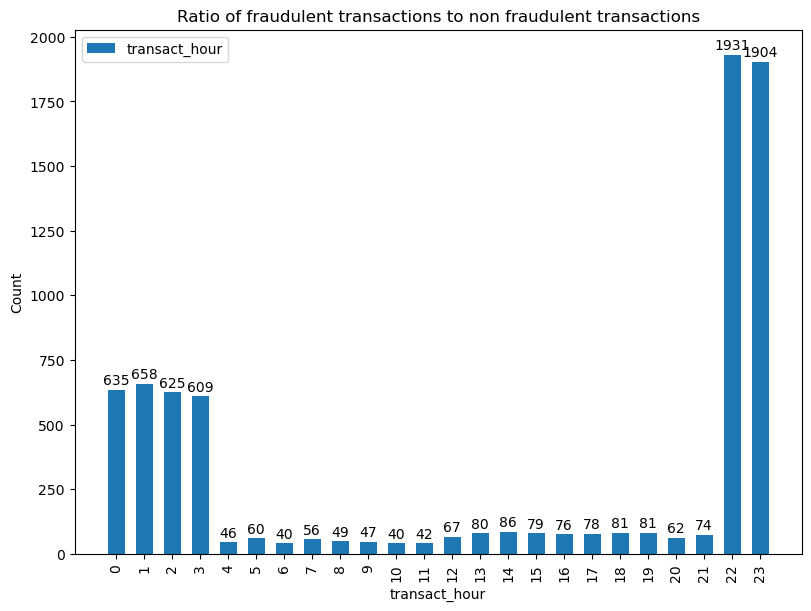

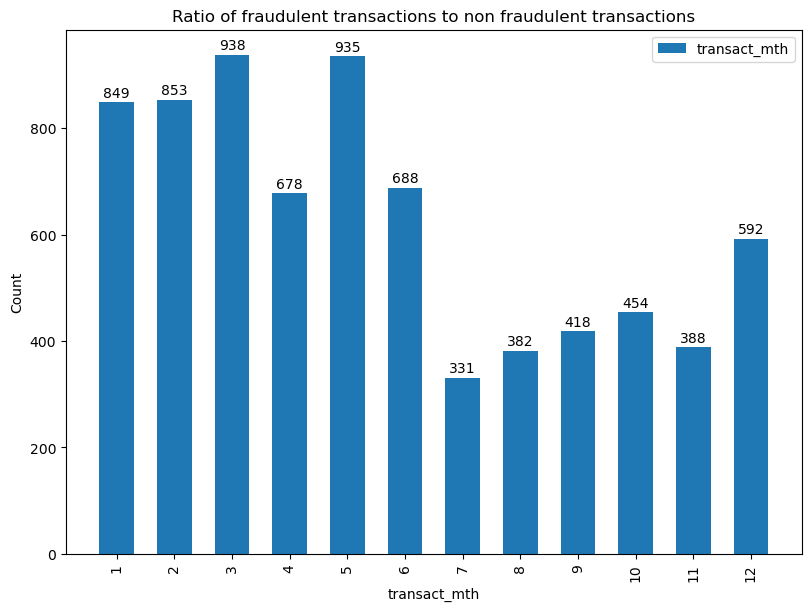

In [10]:
# Time of the day vs fraud transactions
def plot_fraud_counts_by_column(df, column):
    fraud_df = df[df.is_fraud == 1]
    non_df = df[df.is_fraud == 0]
    fraud_ratio = fraud_df.groupby(column).size()
    
    categories = fraud_ratio.index
    x = np.arange(len(categories))
    width = 0.6
    mult = 0
    
    fig, ax = plt.subplots(layout='constrained', figsize = (8, 6))
    rects = ax.bar(x, fraud_ratio, width, label = column)
    ax.bar_label(rects, padding = 1.5)

    ax.set_ylabel("Count")
    ax.set_xticks(x)
    ax.set_xticklabels(categories, rotation=90)
    ax.set_xlabel(column)
    ax.set_title("Ratio of fraudulent transactions to non fraudulent transactions")
    ax.legend(ncols=2)
    plt.show()

columns = ['transact_hour', 'transact_mth']
for cols in columns:
    plot_fraud_counts_by_column(df, cols)

In [11]:
# Geographic location analysis

region_boundaries = {
    'NewEngland': {'lat_range': (40, 47), 'long_range': (-74, -66)},
    'NY_NJ_PuertoRico_VirginIslands': {'lat_range': (17, 45), 'long_range': (-80, -65)},
    'MidAtlantic': {'lat_range': (36, 42), 'long_range': (-83, -74)},
    'Southeast': {'lat_range': (24, 39), 'long_range': (-91, -75)}, 
    'Midwest': {'lat_range': (36, 49), 'long_range': (-93, -80)},  
    'SouthCentral': {'lat_range': (25, 37), 'long_range': (-106, -89)}, 
    'Plains': {'lat_range': (36, 43), 'long_range': (-102, -89)},
    'Mountain': {'lat_range': (37, 49), 'long_range': (-114, -102)}, 
    'WestCoast_PacificIslands': {'lat_range': (13, 42), 'long_range': (-160, -105)},
    'Northwest_Alaska': {'lat_range': (42, 72), 'long_range': (-150, -110)}
}

def get_region_by_lat_long(lat, long):
    for region, bounds in region_boundaries.items():
        lat_min, lat_max = bounds['lat_range']
        long_min, long_max = bounds['long_range']
        if lat_min <= lat <= lat_max and long_min <= long <= long_max:
            return region
    return "Outside US"


In [12]:
# Adding the customer and merchant location columns
df['cust_loc'] = df.apply(lambda row: get_region_by_lat_long(row['lat'], row['long']), axis=1)
df['merch_loc'] = df.apply(lambda row: get_region_by_lat_long(row['merch_lat'], row['merch_long']), axis=1)

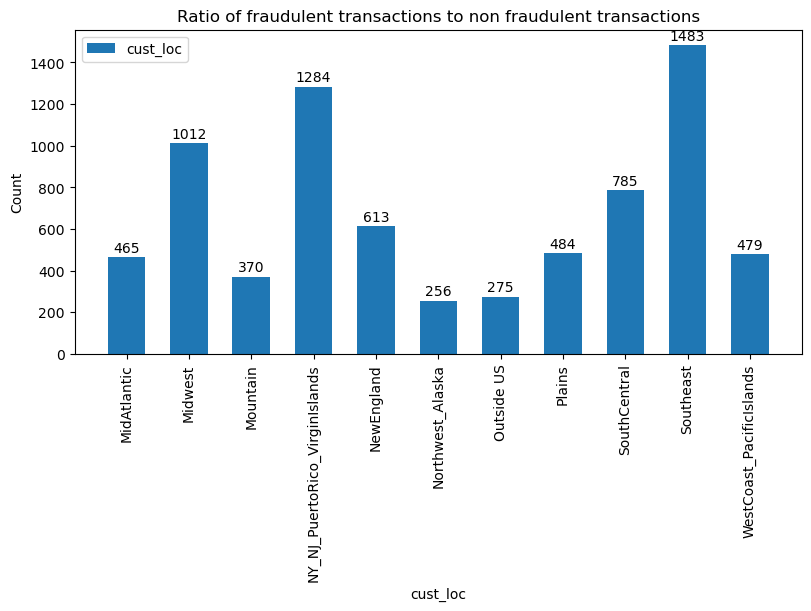

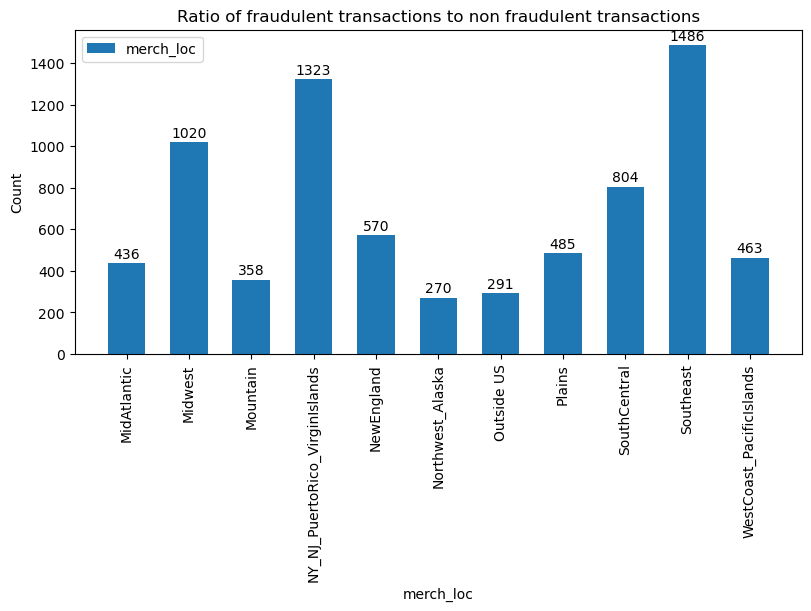

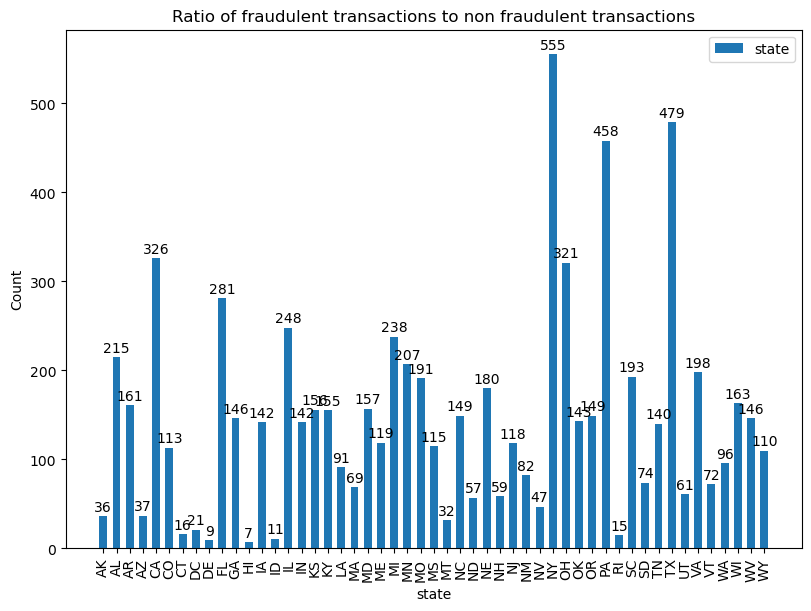

In [13]:
# State and Region analysis
columns = ['cust_loc', 'merch_loc', 'state']
for cols in columns:
    plot_fraud_counts_by_column(df, cols)

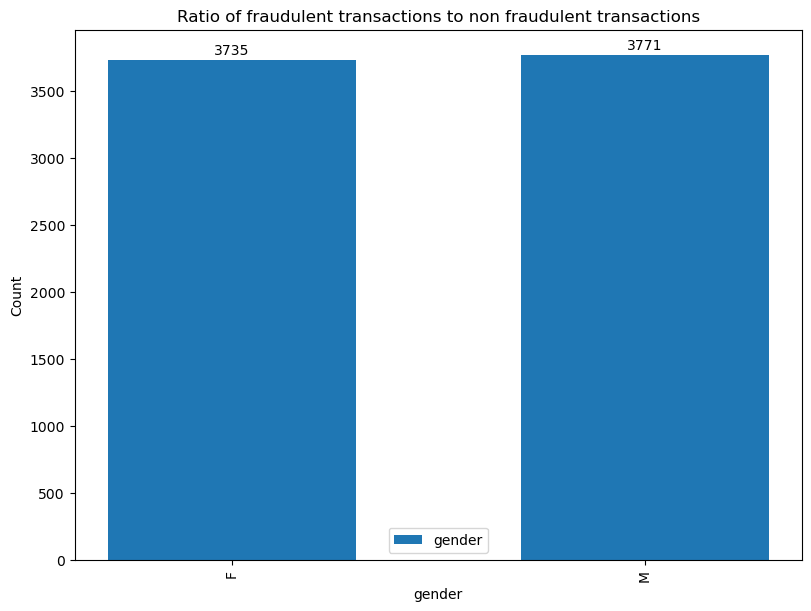

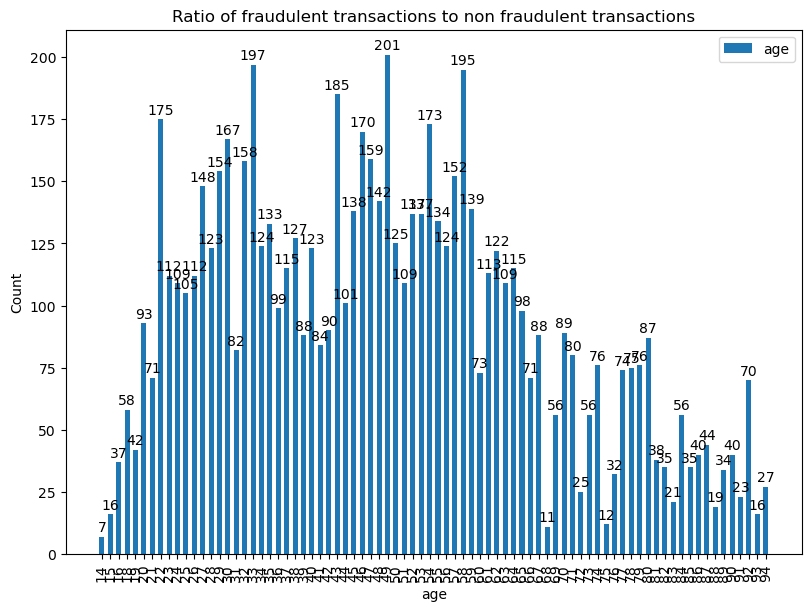

In [14]:
# Age and Gender analysis
columns = ['gender', 'age']
for cols in columns:
    plot_fraud_counts_by_column(df, cols)

## Data Preprocessing

In [15]:
cols = df.columns
print(cols)
df.head()

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'merch_lat',
       'merch_long', 'is_fraud', 'transact_hour', 'transact_mth', 'age',
       'cust_loc', 'merch_loc'],
      dtype='object')


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,dob,trans_num,merch_lat,merch_long,is_fraud,transact_hour,transact_mth,age,cust_loc,merch_loc
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,1988-03-09,0b242abb623afc578575680df30655b9,36.011293,-82.048315,0,0,1,31,MidAtlantic,MidAtlantic
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0,0,1,41,Northwest_Alaska,Northwest_Alaska
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0,0,1,57,Mountain,Mountain
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,1967-01-12,6b849c168bdad6f867558c3793159a81,47.034331,-112.561071,0,0,1,52,Mountain,Mountain
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,1986-03-28,a41d7549acf90789359a9aa5346dcb46,38.674999,-78.632459,0,0,1,33,NY_NJ_PuertoRico_VirginIslands,NY_NJ_PuertoRico_VirginIslands


### Remove Redundant/Unnecessary Columns
In our data we have geographical data in form of both coordinates and city/state location. So we can choose either of them to work with. However as the latitude and longitude data gives us more information, we will keep it and remove street, city and state data as it is redundant. Additionally we drop columns that are redundant or from which we have already extracted relevant data or one which simply has too many unique values for us to resonably handle.

In [16]:
df.drop(['trans_date_trans_time', 'first', 'last', 'street', 'city', 'state', 'zip', 'lat', 'long', 'dob', 'trans_num',
        'merch_lat', 'merch_long'], axis = 1, inplace = True)
new_dataset = df.copy()

In [17]:
cols = df.columns
for col in cols:
    print(f"{col} : {len(df[col].unique())}")

cc_num : 983
merchant : 693
category : 14
amt : 52928
gender : 2
city_pop : 879
job : 494
is_fraud : 2
transact_hour : 24
transact_mth : 12
age : 83
cust_loc : 11
merch_loc : 11


In [18]:
# Encoders for the categorical columns and normalizing the numerical columns
def percentage_encode(df, col):
    normalized_count = df[col].value_counts(normalize = True) * 100
    df[col] = df[col].map(normalized_count)
    
def label_encoder(df, columns):
    for cols in columns:
        unique_values = df[cols].unique()
        name_to_num = {name: i for i, name in enumerate(unique_values)}
        df[cols] = df[cols].map(name_to_num).astype(int)
        
def onehotencode(df, columns):
    for column in columns:
        dummies = pd.get_dummies(df[column], prefix=column).astype(int)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)        
    return df

In [19]:
df.head()

,cc_num,merchant,category,amt,gender,city_pop,job,is_fraud,transact_hour,transact_mth,age,cust_loc,merch_loc
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,3495,"Psychologist, counselling",0,0,1,31,MidAtlantic,MidAtlantic
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,149,Special educational needs teacher,0,0,1,41,Northwest_Alaska,Northwest_Alaska
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,4154,Nature conservation officer,0,0,1,57,Mountain,Mountain
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,1939,Patent attorney,0,0,1,52,Mountain,Mountain
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,99,Dance movement psychotherapist,0,0,1,33,NY_NJ_PuertoRico_VirginIslands,NY_NJ_PuertoRico_VirginIslands


In [20]:
# Percentage Encoder to Normalize the numerical columns
cols = ['cc_num', 'merchant', 'city_pop', 'job']
for col in cols:
    percentage_encode(new_dataset, col)

# Label Encoding the Binary categorical column
col = ['gender']
label_encoder(new_dataset, col)

# One hot encoding the categorical columns
columns = ['category', 'cust_loc', 'merch_loc']
new_dataset = pd.get_dummies(new_dataset, columns=columns, drop_first=True)

In [21]:
new_dataset.head()

,cc_num,merchant,amt,gender,city_pop,job,is_fraud,transact_hour,transact_mth,age,...,merch_loc_Midwest,merch_loc_Mountain,merch_loc_NY_NJ_PuertoRico_VirginIslands,merch_loc_NewEngland,merch_loc_Northwest_Alaska,merch_loc_Outside US,merch_loc_Plains,merch_loc_SouthCentral,merch_loc_Southeast,merch_loc_WestCoast_PacificIslands
0,0.156400,0.097711,4.97,0,0.156400,0.273392,0,0,1,31,...,False,False,False,False,False,False,False,False,False,False
1,0.233675,0.193032,107.23,0,0.234446,0.393237,0,0,1,41,...,False,False,False,False,True,False,False,False,False,False
2,0.038792,0.146143,220.11,1,0.038792,0.039408,0,0,1,57,...,False,True,False,False,False,False,False,False,False,False
3,0.038020,0.201515,45.00,1,0.038020,0.195114,0,0,1,52,...,False,True,False,False,False,False,False,False,False,False
4,0.155552,0.122776,41.96,1,0.194189,0.155552,0,0,1,33,...,False,False,True,False,False,False,False,False,False,False


In [22]:
new_dataset.columns

Index(['cc_num', 'merchant', 'amt', 'gender', 'city_pop', 'job', 'is_fraud',
       'transact_hour', 'transact_mth', 'age', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'cust_loc_Midwest',
       'cust_loc_Mountain', 'cust_loc_NY_NJ_PuertoRico_VirginIslands',
       'cust_loc_NewEngland', 'cust_loc_Northwest_Alaska',
       'cust_loc_Outside US', 'cust_loc_Plains', 'cust_loc_SouthCentral',
       'cust_loc_Southeast', 'cust_loc_WestCoast_PacificIslands',
       'merch_loc_Midwest', 'merch_loc_Mountain',
       'merch_loc_NY_NJ_PuertoRico_VirginIslands', 'merch_loc_NewEngland',
       'merch_loc_Northwest_Alaska', 'merch_loc_Outside US',
       'merch_loc_Plains', 'merch_loc_SouthCentral', 'merch_loc_

In [23]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 43 columns):
 #   Column                                    Non-Null Count    Dtype  
---  ------                                    --------------    -----  
 0   cc_num                                    1296675 non-null  float64
 1   merchant                                  1296675 non-null  float64
 2   amt                                       1296675 non-null  float64
 3   gender                                    1296675 non-null  int32  
 4   city_pop                                  1296675 non-null  float64
 5   job                                       1296675 non-null  float64
 6   is_fraud                                  1296675 non-null  int64  
 7   transact_hour                             1296675 non-null  int32  
 8   transact_mth                              1296675 non-null  int32  
 9   age                                       1296675 non-null  int32  
 10  catego

## Dataset Preparation

### Load and Process the Test Dataset

In [24]:
test = pd.read_csv('fraudTest.csv')

test.drop(['Unnamed: 0', 'unix_time'], axis = 1, inplace = True)

date_time_analysis(test)

# Adding the customer and merchant location columns
test['cust_loc'] = test.apply(lambda row: get_region_by_lat_long(row['lat'], row['long']), axis=1)
test['merch_loc'] = test.apply(lambda row: get_region_by_lat_long(row['merch_lat'], row['merch_long']), axis=1)

# Drop Unnecessary columns
test.drop(['trans_date_trans_time', 'first', 'last', 'street', 'city', 'state', 'zip', 'lat', 'long', 'dob', 'trans_num',
        'merch_lat', 'merch_long'], axis = 1, inplace = True)

# Normalizing the numerical columns
cols = ['cc_num', 'merchant', 'city_pop', 'job']
for col in cols:
    percentage_encode(test, col)

# Label Encoding the Binary categorical column
col = ['gender']
label_encoder(test, col)

# One hot encoding the categorical columns
columns = ['category', 'cust_loc', 'merch_loc']
test = pd.get_dummies(test, columns=columns, drop_first=True)

test.head()


,cc_num,merchant,amt,gender,city_pop,job,is_fraud,transact_hour,transact_mth,age,...,merch_loc_Midwest,merch_loc_Mountain,merch_loc_NY_NJ_PuertoRico_VirginIslands,merch_loc_NewEngland,merch_loc_Northwest_Alaska,merch_loc_Outside US,merch_loc_Plains,merch_loc_SouthCentral,merch_loc_Southeast,merch_loc_WestCoast_PacificIslands
0,0.115166,0.132441,2.86,0,0.115166,0.437271,0,12,6,52,...,False,False,False,False,False,False,False,False,True,False
1,0.150616,0.141258,29.84,1,0.306990,0.456166,0,12,6,30,...,False,True,False,False,False,False,False,False,False,False
2,0.193083,0.135860,41.28,1,0.193083,0.465523,0,12,6,50,...,False,False,True,False,False,False,False,False,False,False
3,0.119305,0.127942,60.05,0,0.119305,0.119305,0,12,6,33,...,False,False,False,False,False,False,False,False,True,False
4,0.160333,0.066580,3.19,0,0.320846,0.160333,0,12,6,65,...,True,False,False,False,False,False,False,False,False,False


### Train and Test Data

In [25]:
# Load the pre-processed dataset
dataset = new_dataset.copy()
# Features and target
X_train = dataset.drop(columns=['is_fraud'])
y_train = dataset['is_fraud']

X_test = test.drop(columns=['is_fraud'])
y_test = test['is_fraud']

## Descision Tree Classifier

### Train the Classifier and find the optimal depth of Tree

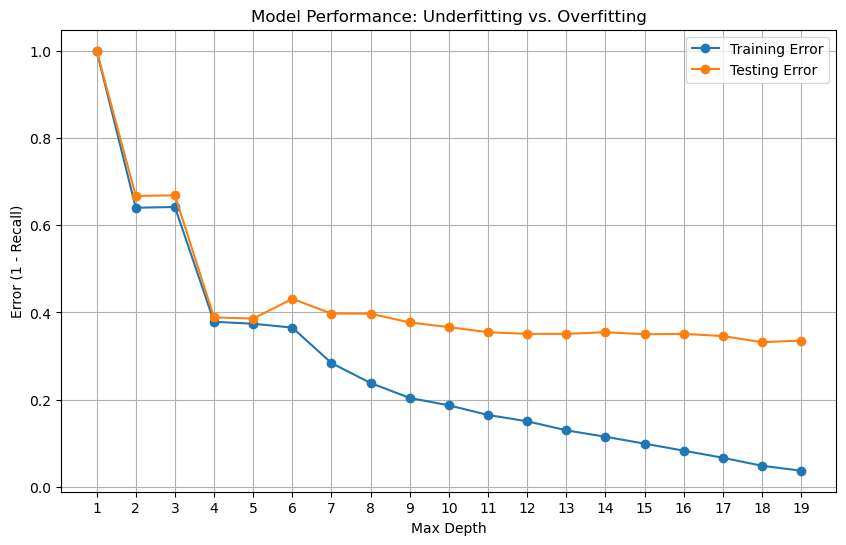

In [26]:
train_errors = []
test_errors = []

for max_depth in range(1, 20):
    # Initialize and train model with different max_depth in each iteration
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    clf.fit(X_train, y_train)

    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    train_recall = recall_score(y_train, y_train_pred)
    test_recall = recall_score(y_test, y_test_pred)

    train_errors.append(1 - train_recall)
    test_errors.append(1 - test_recall)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), train_errors, label="Training Error", marker='o')
plt.plot(range(1, 20), test_errors, label="Testing Error", marker='o')

plt.title("Model Performance: Underfitting vs. Overfitting")
plt.xlabel("Max Depth")
plt.ylabel("Error (1 - Recall)")
plt.xticks(range(1, 20))
plt.legend()
plt.grid()
plt.show()


#### Fittings Analysis
- In depth range [1-4], Both training and testing errors are relatively high, showing underfitting
- In depth range [5-9], Both training and testing errors are relatively low and close to each other, showing good general
- In depth range [10-20], Training error continues to decrease and approach zero, but testing error begins to increase slightly, showing the model is too complex and Overfitts

#### At Depth 7, we can say that since the testing and training errors are low and balance, we can choose it as optimal max_depth of the classifier

In [36]:
# Train a Decision Tree model
clf = DecisionTreeClassifier(max_depth=7, random_state=0)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

### Visualize the Decision Tree

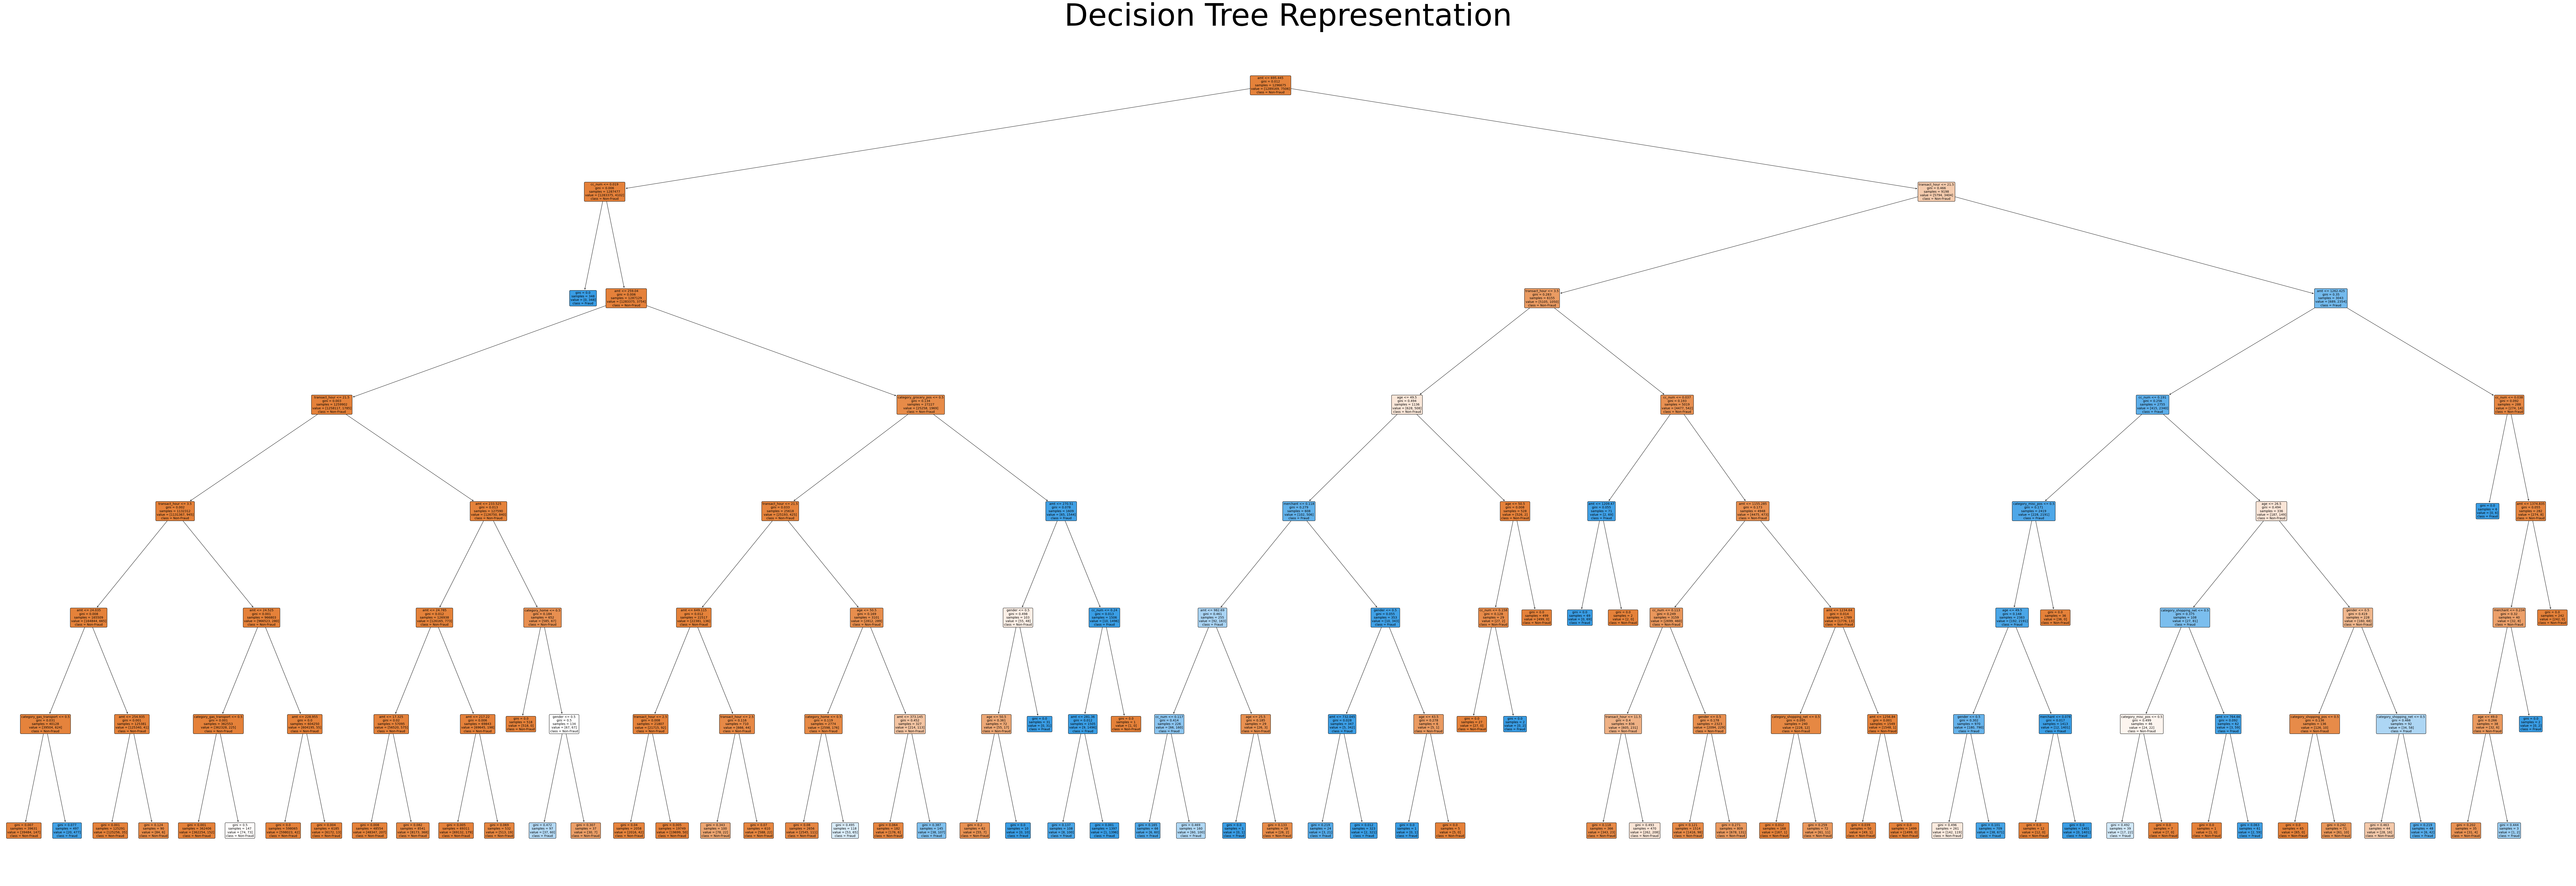

In [32]:
feature_list = ['cc_num', 'merchant', 'amt', 'gender', 'city_pop', 'job',
       'transact_hour', 'transact_mth', 'age', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'cust_loc_Midwest',
       'cust_loc_Mountain', 'cust_loc_NY_NJ_PuertoRico_VirginIslands',
       'cust_loc_NewEngland', 'cust_loc_Northwest_Alaska',
       'cust_loc_Outside US', 'cust_loc_Plains', 'cust_loc_SouthCentral',
       'cust_loc_Southeast', 'cust_loc_WestCoast_PacificIslands',
       'merch_loc_Midwest', 'merch_loc_Mountain',
       'merch_loc_NY_NJ_PuertoRico_VirginIslands', 'merch_loc_NewEngland',
       'merch_loc_Northwest_Alaska', 'merch_loc_Outside US',
       'merch_loc_Plains', 'merch_loc_SouthCentral', 'merch_loc_Southeast',
       'merch_loc_WestCoast_PacificIslands']


plt.figure(figsize=(150, 50)) 
plot_tree(
    clf,
    feature_names=feature_list,
    class_names=["Non-Fraud", "Fraud"], 
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Representation", fontsize=100)
plt.show()

### Evaluate the Model

In [33]:
accuracy = accuracy_score(y_test, y_pred)
accuracy = accuracy * 100
print(f"Accuracy: {accuracy:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 99.81%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.85      0.60      0.71      2145

    accuracy                           1.00    555719
   macro avg       0.93      0.80      0.85    555719
weighted avg       1.00      1.00      1.00    555719


Confusion Matrix:
[[553351    223]
 [   853   1292]]


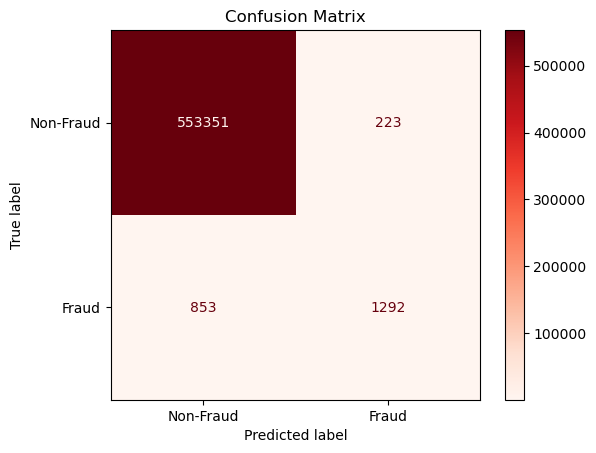

In [34]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Fraud', 'Fraud'])
disp.plot(cmap=plt.cm.Reds)

plt.title('Confusion Matrix')
plt.show()


## Results Analysis

The results indicate that the **DecisionTreeClassifier** performed extremely well overall, with an **accuracy of 99.81%**. However, a closer look at the classification report and confusion matrix reveals some nuances in the model's performance, particularly for the minority class (`1`, which represents fraudulent transactions). Here's a breakdown:

### Key Metrics:
1. **Accuracy (99.79%)**:
   - This is the overall correctness of the model, calculated as `(True Positives + True Negatives) / Total`.
   - The high accuracy is largely due to the overwhelming proportion of the majority class (`0`, representing non-fraudulent transactions), which the model classifies correctly.

2. **Precision**:
   - **Class 0 (non-fraudulent)**: 1.00
     - The model almost perfectly identifies non-fraudulent transactions.
   - **Class 1 (fraudulent)**: 0.85
     - Of all the predicted fraudulent transactions, 85% are actually fraud.

3. **Recall**:
   - **Class 0**: 1.00
     - The model identifies almost all non-fraudulent transactions correctly.
   - **Class 1**: 0.60
     - The model catches 57% of actual fraudulent transactions but misses 43%.

### Confusion Matrix:
- **Class 0 (Non-Fraudulent)**:
  - **True Negatives (553,351)**: Correctly predicted non-fraudulent transactions.
  - **False Positives (853)**: Non-fraudulent transactions mistakenly classified as fraud.
- **Class 1 (Fraudulent)**:
  - **True Positives (1,292)**: Correctly predicted fraudulent transactions.
  - **False Negatives (223)**: Fraudulent transactions missed by the model.

## Conclusion:
- The model performs exceptionally well on the majority class (`0`), which is expected given the data imbalance.
- However, it can still improve in identifying fraudulent transactions (`1`), as evidenced by the lower precision and recall.
- Consider techniques like **class rebalancing** (e.g., oversampling minority class, undersampling majority class) or using a cost-sensitive classifier to improve detection of the minority class (`1`).